In [32]:
#setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind,chi2_contingency, kruskal
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

## Regression Discontinuity: Banking Recovery

In [5]:
data = pd.read_csv("../input/bank-debt-data/bank_data.csv")
print("-- data --")
data.head()

-- data --


,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


## Graphical Exploratory Data Analysis

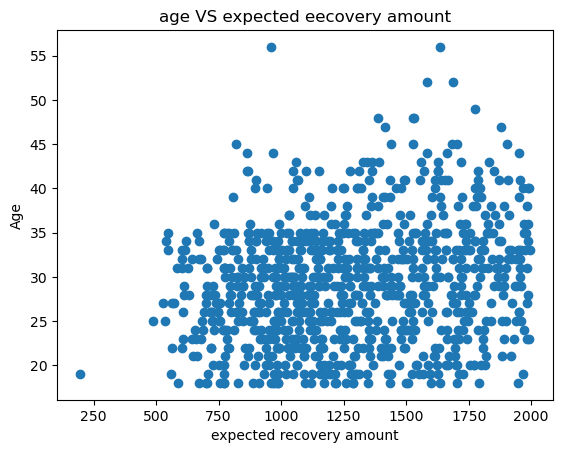

In [12]:
filtered_data = data[(data['expected_recovery_amount'] > 0) & (data['expected_recovery_amount'] <= 2000)]

# scatter plot
plt.scatter(filtered_data['expected_recovery_amount'], filtered_data['age'])
plt.xlabel("expected recovery amount")
plt.ylabel("Age")
plt.title("age VS expected eecovery amount")
plt.show()

## Statistical test: age vs. expected recovery amount

there is no difference
visualization:


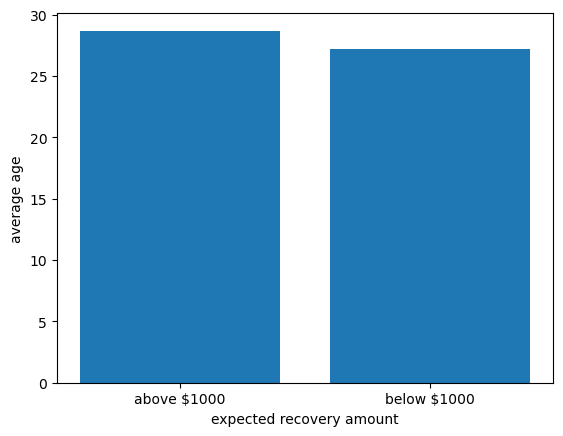

In [20]:
filtered_data = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]

# Split data into two groups (above and below $1000)
above_threshold = filtered_data[filtered_data['expected_recovery_amount'] > 1000]
below_threshold = filtered_data[filtered_data['expected_recovery_amount'] <= 1000]

# t-test for comparison
t_stat, p_value = ttest_ind(above_threshold['age'], below_threshold['age'])

if p_value < 0.05:
    age_test_res = "there is a difference"
else:
    age_test_res = "there is no difference"

print(test_res)
print("visualization:")

# average age for each group
avg_age_above = above_threshold['age'].mean()
avg_age_below = below_threshold['age'].mean()

# bar plot for comparison
plt.bar(['above $1000', 'below $1000'], [avg_age_above, avg_age_below])
plt.xlabel('expected recovery amount')
plt.ylabel('average age')
plt.show()

## Statistical test: sex vs. expected recovery amount

In [21]:
# contingency table
contingency_table = pd.crosstab(filtered_data['sex'], filtered_data['expected_recovery_amount'] > 1000)

# chi-square test for comparison
chi2, p_value, _, _ = chi2_contingency(contingency_table)

# p-value test
if p_value < 0.05:
    sex_test_res = "there is a difference"
else:
    sex_test_res = "there is no difference"

print(sex_test_res)

there is no difference


## Exploratory graphical analysis: recovery amount

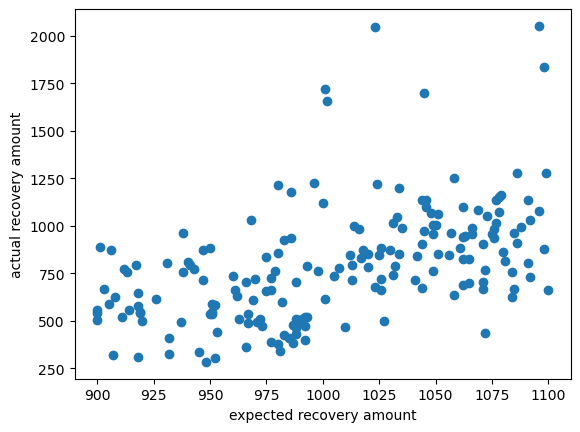

In [24]:
expected_recovery = filtered_data['expected_recovery_amount']
actual_recovery = filtered_data['actual_recovery_amount']

# Create the scatter plot
plt.scatter(expected_recovery, actual_recovery)
plt.xlabel('expected recovery amount')
plt.ylabel('actual recovery amount')
plt.show()


## Statistical analysis: recovery amount

In [31]:
filtered_data_r1 = data[(data['expected_recovery_amount'] >= 900) & (data['expected_recovery_amount'] <= 1100)]
filtered_data_r2 = data[(data['expected_recovery_amount'] >= 950) & (data['expected_recovery_amount'] <= 1050)]

# actual recovery amount for each range
recovery_amounts_r1 = filtered_data_r1['actual_recovery_amount']
recovery_amounts_r2 = filtered_data_r2['actual_recovery_amount']

# Kruskal-Wallis test
test_statistic, p_value = kruskal(recovery_amounts_r1, recovery_amounts_range2)

# p-value test
if p_value < 0.05:
    test_res = "rhere is a difference"
else:
    test_res = "there is no difference"

print(test_res)


there is no difference


## Regression modeling: no threshold

In [58]:
filtered_data_no_threshold = data[(data['expected_recovery_amount'] > 1000) & (data['expected_recovery_amount'] <= 1100)]

expected_recovery_no_threshold = filtered_data_no_threshold['expected_recovery_amount']
actual_recovery_no_threshold = filtered_data_no_threshold['actual_recovery_amount']

X_no_threshold = sm.add_constant(expected_recovery_no_threshold)

model_no_threshold = sm.OLS(actual_recovery_no_threshold, X_no_threshold)
results_no_threshold = model_no_threshold.fit()

coef_no_threshold = results_no_threshold.params[1]
intercept_no_threshold = results_no_threshold.params[0]

print("coefficient: ", coef_no_threshold)
print("intercept: ", intercept_no_threshold)

results_no_threshold.summary()

coefficient:  0.9826150834595861
intercept:  -82.23269300649099


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                 -0.002
Method:                     Least Squares   F-statistic:                    0.8074
Date:                    Mon, 17 Jul 2023   Prob (F-statistic):              0.371
Time:                            12:54:31   Log-Likelihood:                -673.73
No. Observations:                      95   AIC:                             1351.
Df Residuals:                          93   BIC:                             1357.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -82.2327   1152.196     -0.071      0.943   -2370.265    2205.800
expected_recovery_amount     0.9826      1.094      0.899      0.371      -1.189       3.154
==============================================================================
Omnibus:                       44.377   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.923
Skew:                           1.724   Prob(JB):                     8.19e-25
Kurtosis:                       7.016   Cond. No.                     4.02e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.02e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Regression modeling: adding true threshold

In [59]:
filtered_data_true_threshold = data[(data['expected_recovery_amount'] > 1000) & (data['expected_recovery_amount'] <= 1100)]

expected_recovery_true_threshold = filtered_data_true_threshold['expected_recovery_amount']
actual_recovery_true_threshold = filtered_data_true_threshold['actual_recovery_amount']

threshold_indicator = (expected_recovery_true_threshold > 1000).astype(int)

X_true_threshold = sm.add_constant(expected_recovery_true_threshold)
X_true_threshold['threshold_indicator'] = threshold_indicator

model_true_threshold = sm.OLS(actual_recovery_true_threshold, X_true_threshold)

results_true_threshold = model_true_threshold.fit()

results_true_threshold.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.009
Model:                                OLS   Adj. R-squared:                 -0.002
Method:                     Least Squares   F-statistic:                    0.8074
Date:                    Mon, 17 Jul 2023   Prob (F-statistic):              0.371
Time:                            12:54:44   Log-Likelihood:                -673.73
No. Observations:                      95   AIC:                             1351.
Df Residuals:                          93   BIC:                             1357.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                      -41.1163    576.098     -0.071      0.943   -1185.133    1102.900
expected_recovery_amount     0.9826      1.094      0.899      0.371      -1.189       3.154
threshold_indicator        -41.1163    576.098     -0.071      0.943   -1185.133    1102.900
==============================================================================
Omnibus:                       44.377   Durbin-Watson:                   1.825
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              110.923
Skew:                           1.724   Prob(JB):                     8.19e-25
Kurtosis:                       7.016   Cond. No.                     5.21e+18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.89e-30. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

## Regression modeling: adjusting the window

In [63]:
filtered_data_adj = data[(data['expected_recovery_amount'] > 950) & (data['expected_recovery_amount'] <= 1050)]

expected_recovery_adj = filtered_data_adj['expected_recovery_amount']
actual_recovery_adj = filtered_data_adj['actual_recovery_amount']

X_adj = sm.add_constant(expected_recovery_adj)

model_adj = sm.OLS(actual_recovery_adj, X_adj)
results_adj = model_adj.fit()

results_adj.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     actual_recovery_amount   R-squared:                       0.247
Model:                                OLS   Adj. R-squared:                  0.240
Method:                     Least Squares   F-statistic:                     31.55
Date:                    Mon, 17 Jul 2023   Prob (F-statistic):           1.89e-07
Time:                            13:07:29   Log-Likelihood:                -688.75
No. Observations:                      98   AIC:                             1382.
Df Residuals:                          96   BIC:                             1387.
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                    -4603.7516    957.508     -4.808      0.000   -6504.390   -2703.113
expected_recovery_amount     5.3731      0.957      5.617      0.000       3.474       7.272
==============================================================================
Omnibus:                       45.753   Durbin-Watson:                   1.864
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              116.922
Skew:                           1.730   Prob(JB):                     4.08e-26
Kurtosis:                       7.081   Cond. No.                     3.44e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.44e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

**> the relationship btween the "expected recovery amount" and the "actual recovery amount" is still very important even when we narrow down a narrow range (950 to 1050). this provides strong evidence that the higher recovery strategy has an impact on the actual amount of money recovered.**